In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from string import Template
import json
import sys 
sys.path.append('..')
# coEgoNetworks
import src.coegonets as cnets
import src.notebook as nb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
STYLE='bmh'
plt.style.use(STYLE)
font = {'family' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)
mpl.rc('legend',fontsize=12)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('axes',facecolor="white",labelsize=12)
# mpl.rc('text', usetex=True)
PLOT_WIDTH  = 14
PLOT_HEIGHT = 7

In [57]:
# load javascript for sigma JS 
HTML('''<script src="./sigma.min.js"></script>
<script src="./sigma.layout.forceAtlas2.min.js"></script>
<script src="./sigma.renderers.snapshot.min.js"></script>
<script src="./sigma.exporters.svg.min.js"></script>''')

In [46]:
#Read data
DATA_PATH="../DATA/txt/wellness_all"
T = cnets.read_data(DATA_PATH)
#filter data
t = cnets.keyword_filter_all(T, ["#wellness","#fitness"])
print(len(T))
print(len(t))
#build matrix
c, v = cnets.build_COOM(t)
C = cnets.getDF(C=c,V=v)
C

230918
10600
 > processed 10599\10600 docs | 64258 tokens
 > done


,[COUNTS],#fitness,#wellness,#bodyfat,#beyondh2o,#running,#exercise,#health,#nutrition,#gesundheit,...,#plasticsurgeon,#businesstravel,#traveltip,#businesstrip,#frequentflyer,#domenica,#breathe,#naturelovers,#viral,#prostata
[COUNTS],0,10600,10600,5,2,148,1361,6658,1618,9,...,1,1,1,1,1,1,1,1,1,1
#fitness,10600,0,531,5,2,148,2,6658,187,9,...,1,1,1,1,1,1,1,1,1,1
#wellness,10600,531,0,5,2,148,1361,1,187,9,...,1,1,1,1,1,1,1,1,1,1
#bodyfat,5,5,5,0,2,0,2,2,2,0,...,0,0,0,0,0,0,0,0,0,0
#beyondh2o,2,2,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#running,148,148,148,0,0,0,46,108,18,0,...,0,0,0,0,0,0,0,0,0,0
#exercise,1361,2,1361,2,0,46,0,6,19,0,...,0,0,0,0,0,0,0,0,0,0
#health,6658,6658,1,2,0,108,6,0,42,2,...,1,1,1,1,1,0,0,0,1,0
#nutrition,1618,187,187,2,0,18,19,42,0,0,...,0,0,0,0,0,0,0,0,0,0
#gesundheit,9,9,9,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0.98, 'Top 10 Hashtag Frequency')

/Users/samir/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


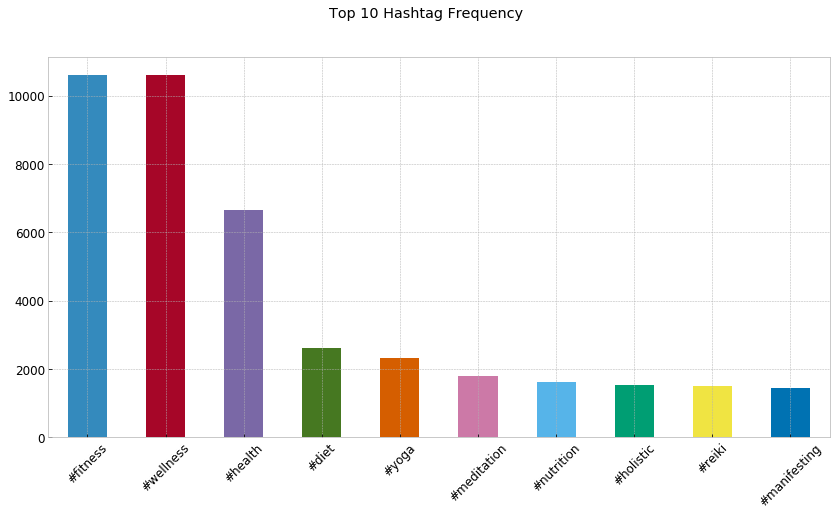

In [47]:
#top K occurrences
K=10
oc = nb.top_k(C, K)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
oc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("Top {} Hashtag Frequency".format(K))

Text(0.5, 0.98, '#wellness: top 10 coocurrences')

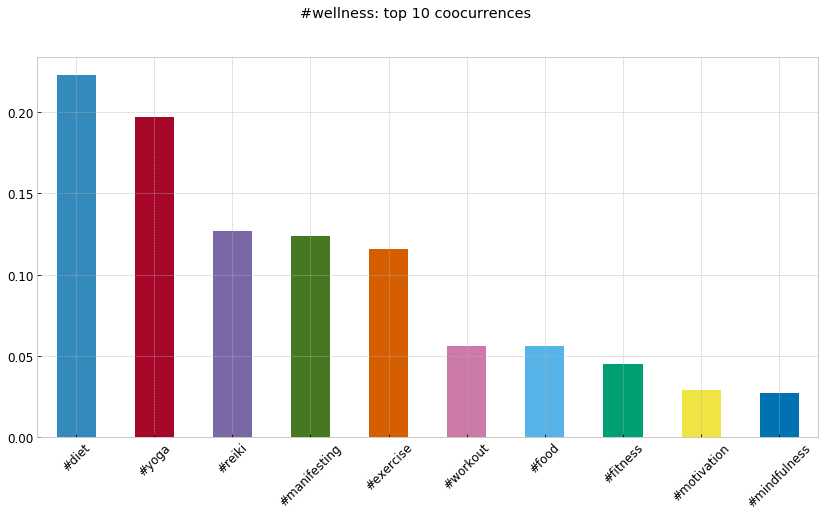

In [48]:
#top K co-occurrences
target_word = "#wellness"
cooc = nb.top_k_cooc(C,target_word,K, True)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
cooc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("{}: top {} coocurrences".format(target_word, K))

In [63]:
#plot top co-occurrences
top_words = list(cooc.keys())
graph = nb.sigmaJSGraph(C, top_words, style=STYLE) 
HTML(graph) 